# Classification for Swedish leaf Dataset

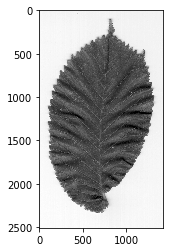

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "G:/Internship_2020/"

CATEGORIES = ["leaf1", "leaf2","leaf3", "leaf4","leaf5", "leaf6","leaf7", "leaf8","leaf9", "leaf10","leaf11","leaf12","leaf13","leaf14","leaf15"]


for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
#         img_array = cv2.imread(os.path.join(path,img))  
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  

        break  
    break  

In [11]:
print(img_array.shape)

(2508, 1423)


## Green Pigment

In [14]:
# IMG_SIZE=190

# new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
# new_array_1 = new_array.copy()

# new_array_1[:,:,0] = 0
# new_array_1[:,:,2] = 0

# plt.imshow(new_array_1)
# plt.show()

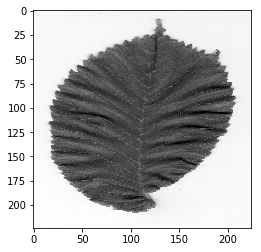

In [12]:
IMG_SIZE=224


new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

plt.imshow(new_array, cmap='gray')
plt.show()

In [13]:
training_data = []

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
#                 img_array = cv2.imread(os.path.join(path,img) )  # convert to array
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
#                 new_array_1 = new_array.copy() #Next three lines only for green_pigment

#                 new_array_1[:,:,0] = 0
#                 new_array_1[:,:,2] = 0
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 510/510 [00:42<00:00, 12.00it/s]


7650


In [15]:
import random
random.shuffle(training_data)

In [17]:
for sample in training_data[:15]:
    print(sample[1])

14
6
1
6
5
13
5
13
12
5
7
2
3
9
12


In [18]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE,1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)


# print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE,3))      #3 is for RGB
# X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,3)

[[[[250]
   [251]
   [250]
   ...
   [250]
   [250]
   [250]]

  [[250]
   [250]
   [249]
   ...
   [250]
   [250]
   [250]]

  [[249]
   [248]
   [249]
   ...
   [250]
   [250]
   [250]]

  ...

  [[248]
   [248]
   [248]
   ...
   [250]
   [250]
   [250]]

  [[248]
   [248]
   [248]
   ...
   [250]
   [250]
   [250]]

  [[248]
   [248]
   [248]
   ...
   [250]
   [250]
   [250]]]]


In [19]:
import pickle

pickle_out = open("X_Augumented_Grayscale","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_Augumented_Grayscale","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [5]:
pickle_in = open("X_Augumented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_Augumented_Grayscale","rb")
y = pickle.load(pickle_in)



X= X/255.0


MemoryError: 

In [21]:
X.shape[1:]

(224, 224, 1)

# Basic_CNN

In [1]:
# %load_ext tensorboard
# %tensorboard --logdir logs
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

NAME="Basic_CNN_2_Augumented"

pickle_in = open("X_Augumented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_Augumented_Grayscale","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(100, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard = TensorBoard(log_dir="logs\\{}".format(NAME))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X, y, epochs=10, validation_split=0.2,callbacks=[tensorboard])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 6120 samples, validate on 1530 samples
Epoch 1/10
6120/6120 [==============================] - 76s 12ms/sample - loss: 1.2855 - acc: 0.6083 - val_loss: 0.6437 - val_acc: 0.8105
Epoch 2/10
6120/6120 [==============================] - 52s 8ms/sample - loss: 0.3387 - acc: 0.8907 - val_loss: 0.5205 - val_acc: 0.8373
Epoch 3/10
6120/6120 [==============================] - 53s 9ms/sample - loss: 0.1495 - acc: 0.9572 - val_loss: 0.4175 - val_acc: 0.8778
Epoch 4/10
6120/6120 [==============================] - 52s 9ms/sample - loss: 0.0890 - acc: 0.9717 - val_loss: 0.4570 - val_acc: 0.8830
Epoch 5/10
6120/6120 [==============================] - 51s 8ms/sample - loss: 0.0449 - acc: 0.9871 - val_loss: 0.5365 - val_acc: 0.8575
Epoch 6/10
6120/6120 [==============================] - 52s 9ms/sample - loss: 0.0171 - acc: 0.9956 - val_loss: 0.4547 - val_acc: 0.9013
Epoch 7/10
6120/6120 [==============================] - 51s 8ms/sample - loss: 0.0056 - acc: 0.9985 - val_loss: 0.6290 - val_acc:

# Optimized CNN

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

NAME = "Final_Module_test_3_Augumented"

pickle_in = open("X_Augumented_Grayscale","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_Augumented_Grayscale","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(100, (5, 5), padding="same",strides=(2,2),activation="relu",input_shape=X.shape[1:]))
# model.add(Conv2D(228, (3, 3), input_shape=X.shape[1:]))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5, 5),strides=(5,5)))

model.add(Conv2D(250, (5, 5), padding="same",strides=(2,2),activation="relu"))
# model.add(Conv2D(228, (3, 3), input_shape=X.shape[1:]))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5, 5),strides=(2,2)))

# model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
# model.add(Dense(240))
# model.add(Activation('relu'))

# model.add(Dense(1))
# model.add(Activation('softmax'))



# model.add(Conv2D(100, (1, 1), padding="same",strides=(1,1)))
# model.add(Activation('relu'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard = TensorBoard(log_dir="logs\\{}".format(NAME))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

model.fit(X, y,
          epochs=10,
          validation_split=0.2,
          callbacks=[tensorboard])

model.summary()

Train on 6120 samples, validate on 1530 samples
Epoch 1/10
6120/6120 [==============================] - 14s 2ms/sample - loss: 1.4371 - acc: 0.5124 - val_loss: 0.7056 - val_acc: 0.7601
Epoch 2/10
6120/6120 [==============================] - 12s 2ms/sample - loss: 0.4568 - acc: 0.8431 - val_loss: 0.3227 - val_acc: 0.8954
Epoch 3/10
6120/6120 [==============================] - 12s 2ms/sample - loss: 0.2736 - acc: 0.9046 - val_loss: 0.3102 - val_acc: 0.8869
Epoch 4/10
6120/6120 [==============================] - 13s 2ms/sample - loss: 0.1716 - acc: 0.9410 - val_loss: 0.1723 - val_acc: 0.9425
Epoch 5/10
6120/6120 [==============================] - 13s 2ms/sample - loss: 0.1085 - acc: 0.9641 - val_loss: 0.1008 - val_acc: 0.9595
Epoch 6/10
6120/6120 [==============================] - 13s 2ms/sample - loss: 0.0750 - acc: 0.9740 - val_loss: 0.1804 - val_acc: 0.9346
Epoch 7/10
6120/6120 [==============================] - 13s 2ms/sample - loss: 0.0661 - acc: 0.9765 - val_loss: 0.1065 - val_acc: 

# Iterative method for  CNN_optimization

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0,1,2]
layer_sizes = [100,250]
conv_layers = [1,2,3]


for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())
            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(10))
            model.add(Activation('softmax'))
            
            tensorboard = TensorBoard(log_dir="logs\\{}".format(NAME))

            model.compile(loss='sparse_categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      epochs=5,
                      batch_size=2,
                      validation_split=0.2,
                      callbacks=[tensorboard])

1-conv-75-nodes-0-dense-1589617860
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 600 samples, validate on 150 samples
Epoch 1/5
600/600 [==============================] - 30s 50ms/sample - loss: 3.3367 - acc: 0.5883 - val_loss: 0.6129 - val_acc: 0.8067
Epoch 2/5
600/600 [==============================] - 21s 34ms/sample - loss: 0.3159 - acc: 0.9233 - val_loss: 0.3984 - val_acc: 0.8267
Epoch 3/5
600/600 [==============================] - 21s 34ms/sample - loss: 0.0535 - acc: 0.9867 - val_loss: 0.3700 - val_acc: 0.8467
Epoch 4/5
600/600 [==============================] - 21s 34ms/sample - loss: 0.0061 - acc: 1.0000 - val_loss: 0.4446 - val_acc: 0.8400
Epoch 5/5
600/600 [==============================] - 21s 34ms/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 0.4100 - val_acc: 0.8467
2-conv-75-nodes-0-dense-1589617974
Train on 600 samples, validate on 150 samples
Epoch 1/5
600/600 [==========================

ResourceExhaustedError: OOM when allocating tensor with shape[883600,100] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node Adam_9/Adam/update_dense_12/kernel/ResourceApplyAdam}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

NAME = "Alexnet_Swedish_leaf"

pickle_in = open("X_1.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_1.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=X.shape[1:], kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(15))
model.add(Activation('softmax'))

tensorboard = TensorBoard(log_dir="logs\\{}".format(NAME))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

model.fit(X, y,
          epochs=40,
          validation_split=0.2,
          callbacks=[tensorboard])

ValueError: Negative dimension size caused by subtracting 3 from 2 for 'conv2d_10/Conv2D' (op: 'Conv2D') with input shapes: [?,2,2,384], [3,3,384,256].